# Predicting Heart Attack

## The Gole of this project: 
1- Apply the EDA methods to understand the data more. 

2- Determine if the patient is at risk of having a heart attack.


## Tools:
- numpy 
- pandas
- matplotlib 
- sklearn 
- seaborn

### ML models: 
- Logistic Regression
- Gradient Boost
- Random Forest


In [35]:
%matplotlib inline    

import numpy as np     
import pandas as pd       
import matplotlib.pyplot as plt     
import seaborn as sns
    
from sklearn.ensemble import RandomForestClassifier     
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 

from xgboost.sklearn import XGBClassifier     
from xgboost import plot_importance     

import joblib  
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_auc_score, recall_score, roc_curve
from sklearn.metrics import make_scorer, confusion_matrix, classification_report    
import warnings   
warnings.filterwarnings('ignore')

## 1.Importing the dataset

In [2]:
df = pd.read_csv("C:/Users/Ashjan/Documents/Sdaya bootcamp/Projects/Classification/Project1/Data/heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Exploratory Data Analysis

### a.Check the number of unique values in each column

In [5]:
dict = {} 
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose() 

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [6]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

### b.Summary statistics

In [7]:
df[con_cols].describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
print(df[df.duplicated()])#Duplicate rows

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [10]:
df1=df.drop_duplicates()

In [11]:
df1.shape

(302, 14)

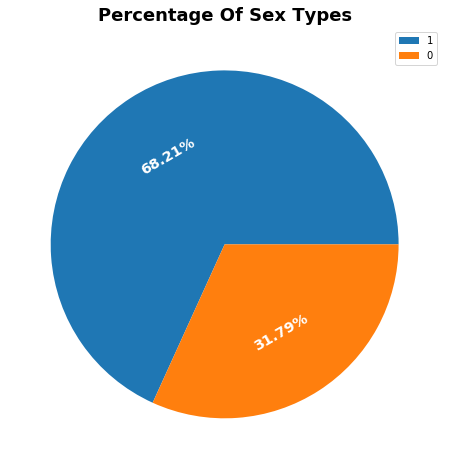

In [12]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df1['sex']), 
        labels = [1,0],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
plt.title('Percentage Of Sex Types', fontsize = 18, fontweight = 'bold')
plt.show()

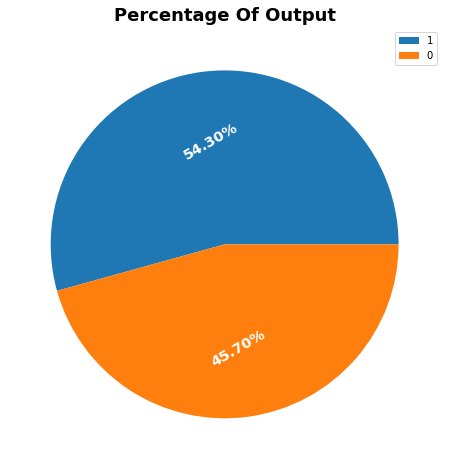

In [13]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df1['output']),
       labels = [1,0],
       autopct = '%.2f%%',
       textprops = {'size' : 'x-large',
                   'fontweight' : 'bold',
                   'rotation' : '30',
                   'color' : 'w'})

plt.legend()
plt.title('Percentage Of Output', fontsize = 18, fontweight = 'bold')
plt.show()

# Analysis of each category of the numerical variables

In [14]:
Target = 'output'
pd.crosstab(df[Target], columns = 'Normalized', normalize = True)

col_0,Normalized
output,
0,0.455446
1,0.544554


age              AxesSubplot(0.1,0.679412;0.363636x0.220588)
chol        AxesSubplot(0.536364,0.679412;0.363636x0.220588)
oldpeak          AxesSubplot(0.1,0.414706;0.363636x0.220588)
thalachh    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
trtbps               AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

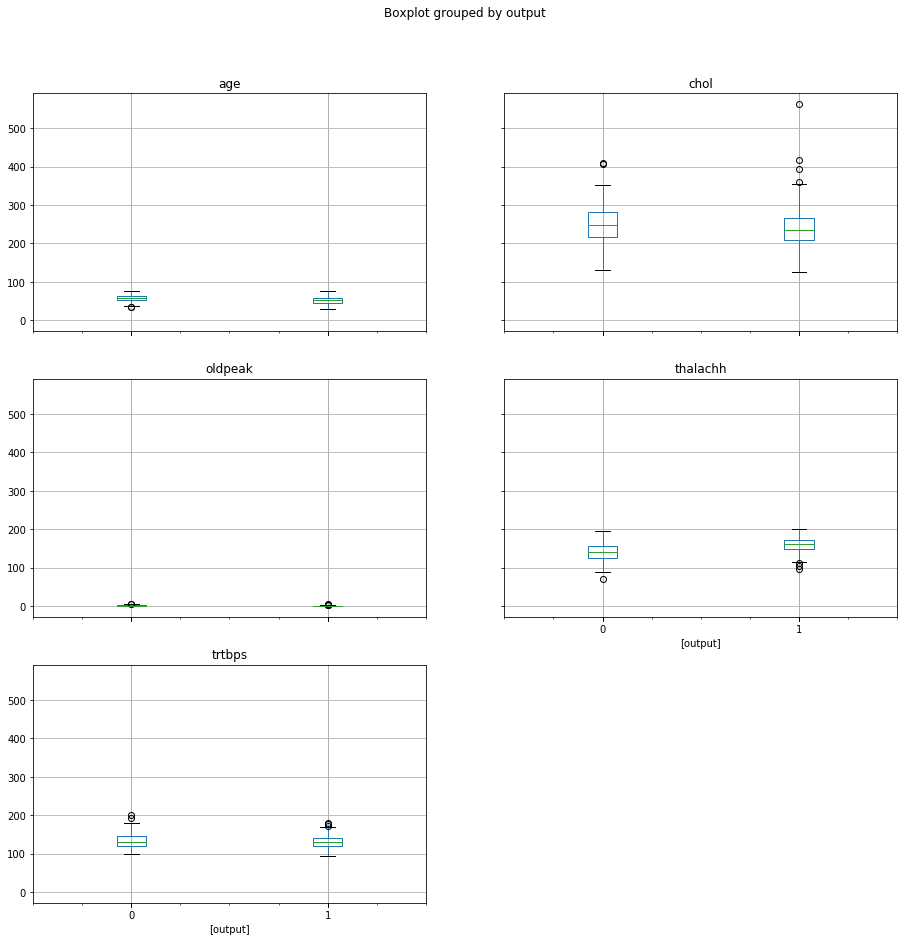

In [15]:
num_cols_viz = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (15, 15))
df1.loc[:, [Target]+num_cols_viz].boxplot(by = Target, ax = axes, return_type = 'axes')

### The boxplots show the following 
1- The "thalachh" boxplot shows that greater the heart beat rate, higher the chance of a person experiencing a heart attack.



2- The "trtbps" shows that lower the resting blood pressure, higher the chance of a person experiencing a heart attack.

# Analysis of each category of the categorical variables 

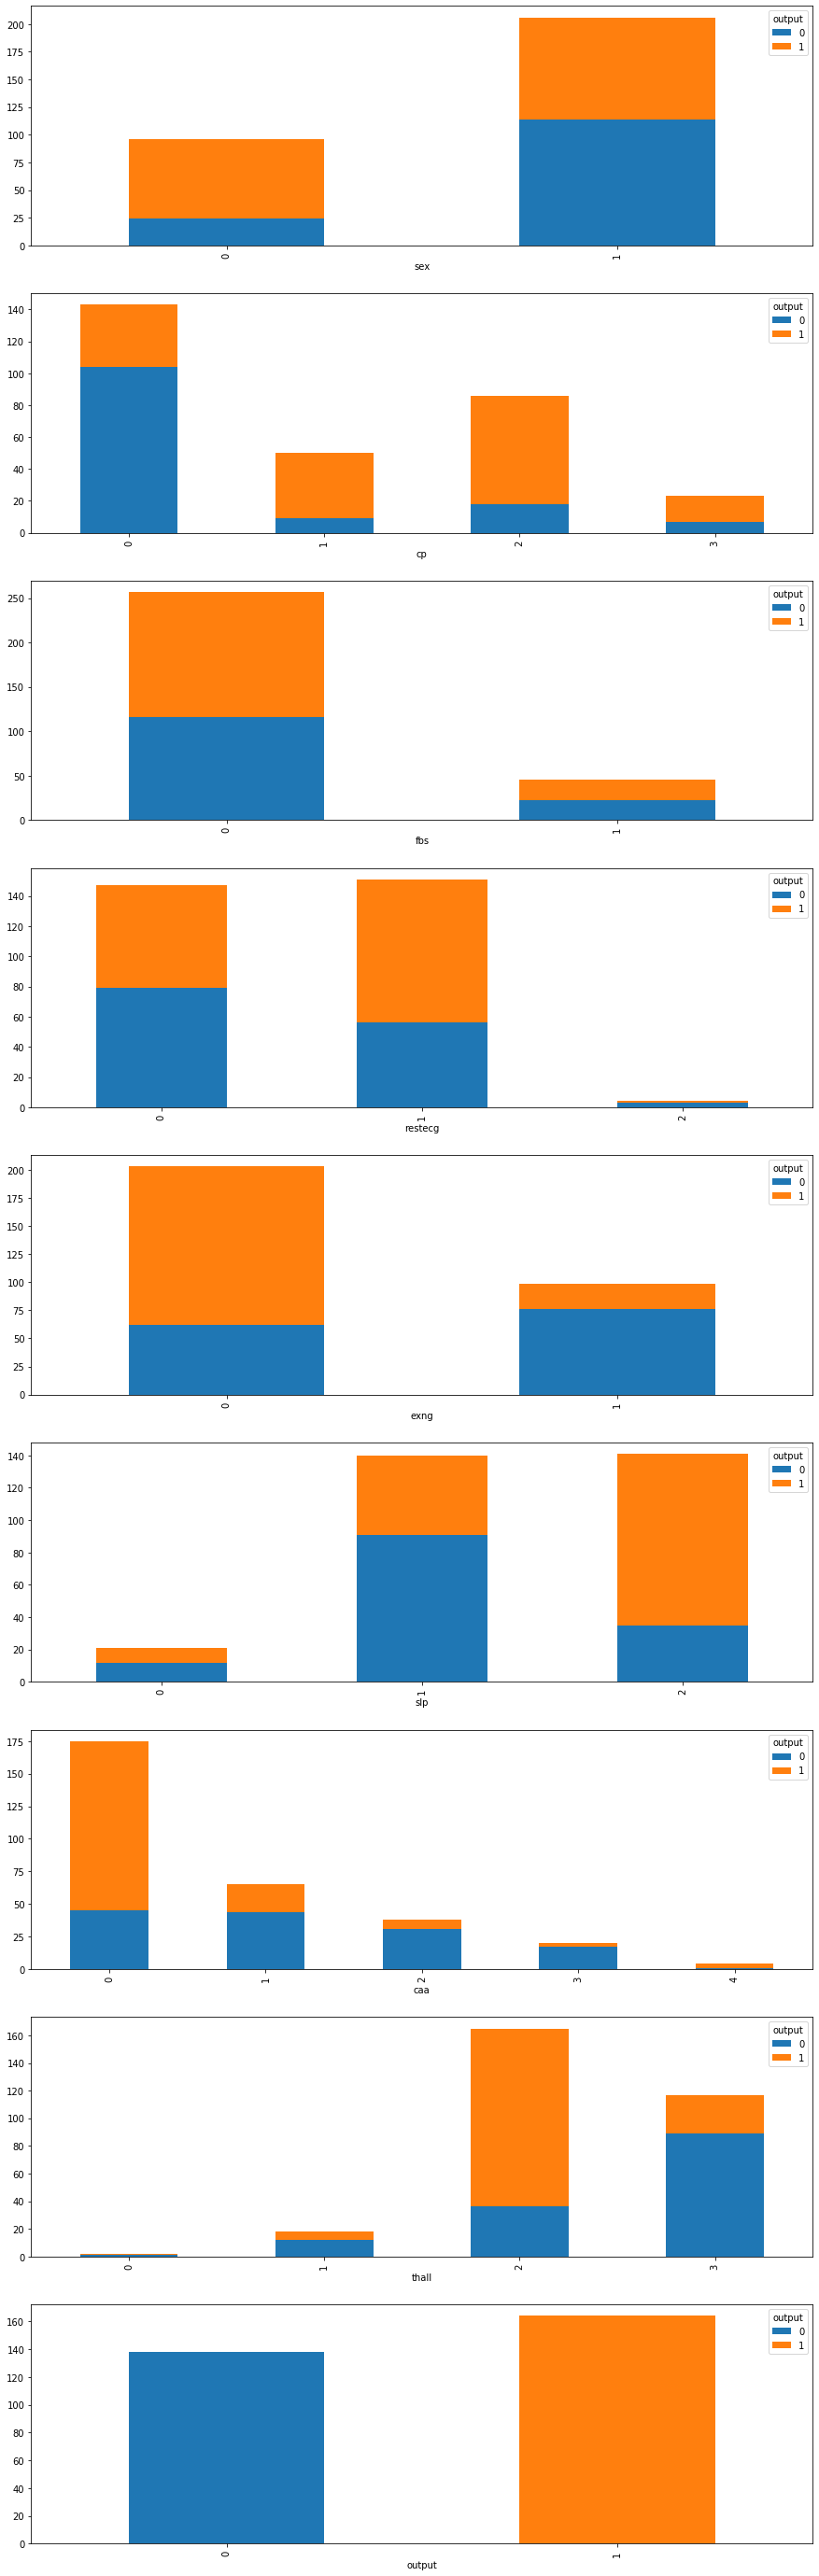

In [16]:
obj_cols_viz = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
fig, axes = plt.subplots(len(obj_cols_viz), sharex = False, sharey = False, figsize = (15, 50))

for i in range(0, len(obj_cols_viz)):
    pd.crosstab(df1[obj_cols_viz[i]], df1[Target]).plot(kind = 'bar', stacked = True, grid = False, ax = axes[i])

### The stacked bar charts show
1- Sex 0 is more prone to a heart attack as compared to Sex 1.

2- Persons having cp(chestpain) of type 1, type 2 & type 3 are more prone to a heart attack .

3- Persons having restecg of type 1 are more prone to a heart attack.

4- Persons not having exng(exercise indused angina) are more prone to a heart attack.

5- Persons having slp of type 2 are more prone to a heart attack.

6- Persons having 0 major vessels are more prone to a heart attack.

7- Persons having thall(thal rate) of type 2 are more prone to a heart attack.

So, overall we can say that a person who is of Sex 0 and has a cp of type 1, 2 or 3 and has a restecg of type 1 and doesn't have exng and has an slp of type 2 and has 0 major vessels and has a thall of type 2 is more prone to a heart attack.

# Feature Engineering

In [17]:
# Creating Dummy 
# Variables Numerical columns data
df2 = df1[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]

# Categorical columns data
df3 = df1[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]

# Creating dummies
df_new_dummies = pd.get_dummies(df3)
print(df_new_dummies.shape)
df_new_dummies.head()

(302, 8)


,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [18]:
new_final_df = pd.concat([df2, df_new_dummies], axis = 1)
print(new_final_df.shape)
new_final_df.head()

(302, 14)


,age,trtbps,chol,thalachh,oldpeak,output,sex,cp,fbs,restecg,exng,slp,caa,thall
0,63,145,233,150,2.3,1,1,3,1,0,0,0,0,1
1,37,130,250,187,3.5,1,1,2,0,1,0,0,0,2
2,41,130,204,172,1.4,1,0,1,0,0,0,2,0,2
3,56,120,236,178,0.8,1,1,1,0,1,0,2,0,2
4,57,120,354,163,0.6,1,0,0,0,1,1,2,0,2


In [24]:
def plot_roc_auc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate train and test roc curve
    '''
      
    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)
    
    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr_train, tpr_train, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr_train, tpr_train, fpr_test, tpr_test)
        
    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr_train, tpr_train, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_test, tpr_test, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr_train, tpr_train, fpr_test, tpr_test, fpr_val, tpr_val) 

In [25]:
def roc_plot(fpr_train, tpr_train, fpr_test, tpr_test, *args):
    '''
    Generate roc plot
    '''
    
    fig = plt.plot(fpr_train, tpr_train, label = 'Train')
    fig = plt.plot(fpr_test, tpr_test, label = 'Test')
    
    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Sensitivity)")
        plt.legend(loc = 'lower right')
        plt.grid(True)
        plt.show()
    
    else:
        fig = plt.plot(args[0], args[1], label = 'Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Sensitivity)")
        plt.legend(loc = 'lower right')
        plt.grid(True)
        plt.show()

# Appling prediction models

In [19]:
X = new_final_df.drop(['output'], axis = 1)
y = new_final_df['output']

In [20]:
from imblearn.over_sampling import SMOTE

In [41]:
 X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 100) 

print('Train Shape: ', X_train.shape)
print('Test Shape: ', X_test.shape)

Train Shape:  (211, 13)
Test Shape:  (91, 13)


## 1. GBM (Gradient Boosting)

In [23]:
model_parameters = {'n_estimators': [10, 50, 100, 200, 500, 750, 1000], 'max_depth': [3, 5, 10],
                    'min_samples_leaf': [np.random.randint(1,10)], 'max_features': [None, 'sqrt', 'log2']}

In [28]:
model = GradientBoostingClassifier(random_state = 10)
gscv_GBM = GridSearchCV(estimator = model, 
                        param_grid = model_parameters, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs = -1,
                        scoring = 'roc_auc')

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1],
                         'n_estimators': [10, 50, 100, 200, 500, 750, 1000]},
             scoring='roc_auc', verbose=1)

In [29]:
print('The best parameters are -', gscv_GBM.best_params_)

The best parameters are - {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}


In [30]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='sqrt', n_estimators=200)

In [31]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [32]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       121

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.73      0.84      0.78        43

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [33]:
joblib.dump(final_mod_GBM, 'best_model_GBM.joblib')

['best_model_GBM.joblib']

Train AUC =  1.0
Test AUC =  0.875968992248062


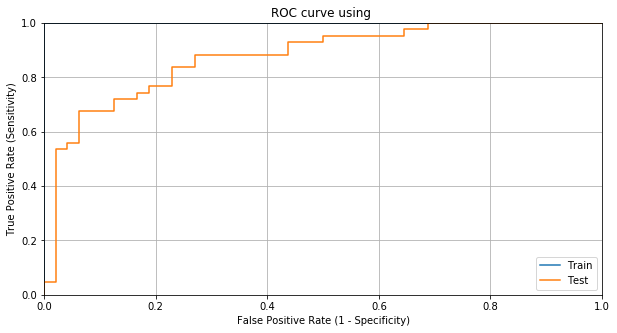

In [36]:
plt.subplots(figsize = (10, 5))
train_prob = final_mod_GBM.predict_proba(X_train)[:, 1]
test_prob = final_mod_GBM.predict_proba(X_test)[:, 1]

plot_roc_auc_curve(y_train, train_prob, y_test, test_prob)

In [81]:
y_pred = gscv_GBM.predict(X_test)
predictions = [round(value) for value in y_pred]

In [82]:
GBM_accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.92%


## 2.Logistic Regression Model  

In [96]:
log_reg = LogisticRegression(solver ='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [97]:
train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

In [98]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        90
           1       0.84      0.93      0.88       121

    accuracy                           0.86       211
   macro avg       0.87      0.84      0.85       211
weighted avg       0.86      0.86      0.86       211

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.80      0.93      0.86        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



Train AUC =  0.9277318640955003
Test AUC =  0.8914728682170542


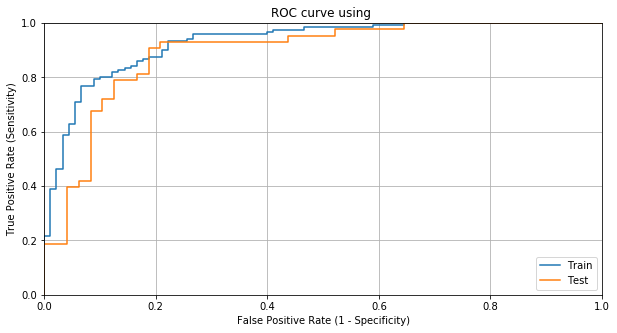

In [99]:
plt.subplots(figsize = (10, 5))
train_prob = log_reg.predict_proba(X_train)[:, 1]
test_prob = log_reg.predict_proba(X_test)[:, 1]

plot_roc_auc_curve(y_train, train_prob, y_test, test_prob)

In [100]:
y_pred = log_reg.predict(X_test)
predictions = [round(value) for value in y_pred]

In [101]:
lr_accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.92%


# 3. Random Forest Classifier

### a.model parameters to be tuned

In [50]:
model_parameters = {'n_estimators': [10, 50, 100, 200, 500, 750, 1000], 'max_depth': [3, 5, 10],
                    'min_samples_leaf': [np.random.randint(1,10)], 'max_features': [None, 'sqrt', 'log2']}

### b.Using GridSearch Cross Validation to find out the best parameters using L2 penalty

In [51]:
model = RandomForestClassifier(random_state = 10)
gscv_randfor = GridSearchCV(estimator = model, 
                        param_grid = model_parameters, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs = -1,
                        scoring = 'roc_auc')

gscv_randfor.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [3],
                         'n_estimators': [10, 50, 100, 200, 500, 750, 1000]},
             scoring='roc_auc', verbose=1)

### c. The best parameters

In [52]:
print('The best parameters are -', gscv_randfor.best_params_)

The best parameters are - {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 1000}


### d. Refitting the model with best parameters

In [53]:
final_mod_randfor = GradientBoostingClassifier(**gscv_randfor.best_params_)
final_mod_randfor.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                           n_estimators=1000)

In [54]:
train_pred = final_mod_randfor.predict(X_train)
test_pred = final_mod_randfor.predict(X_test)

In [55]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       121

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77        48
           1       0.73      0.81      0.77        43

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



Train AUC =  1.0
Test AUC =  0.8687015503875969


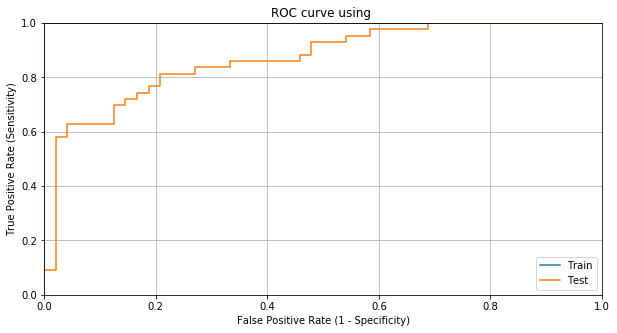

In [73]:
plt.subplots(figsize = (10, 5))
train_prob = final_mod_randfor.predict_proba(X_train)[:, 1]
test_prob = final_mod_randfor.predict_proba(X_test)[:, 1]

plot_roc_auc_curve(y_train, train_prob, y_test, test_prob)

In [74]:
y_pred = final_mod_randfor.predict(X_test)
predictions = [round(value) for value in y_pred]

In [85]:
rf_accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.92%


# Models Comparison

## a. Confusion Matrix

In [76]:
# Predicted values
y_head_GBM = final_mod_GBM.predict(X_test)
y_head_lr = log_reg.predict(X_test)
y_head_rf = final_mod_randfor.predict(X_test)

In [77]:
cm_GBM = confusion_matrix(y_test,y_head_GBM)
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_rf = confusion_matrix(y_test,y_head_rf)

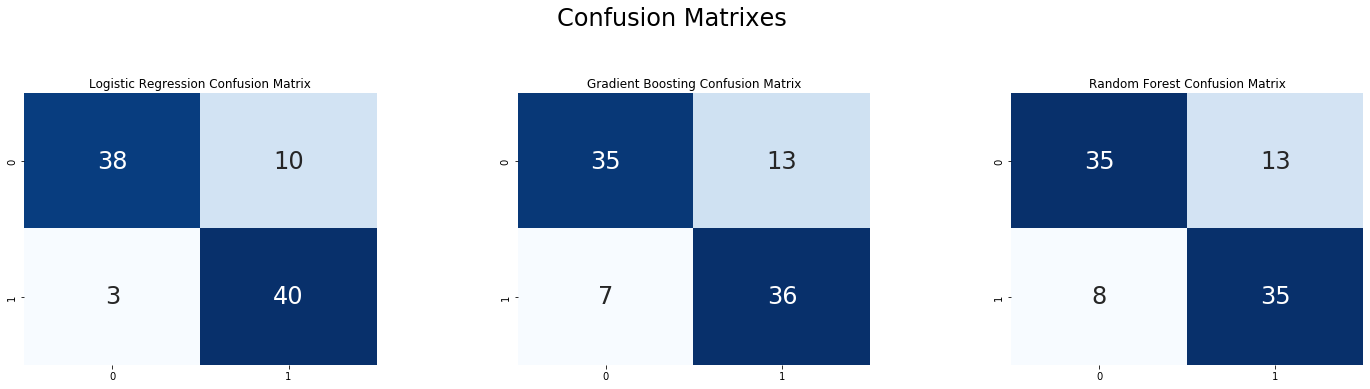

In [78]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm_GBM,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [89]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Gradient Boost'], 'Accuracy': [GBM_accuracy*100,
                    rf_accuracy*100,lr_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,78.021978
1,Random Forest,78.021978
2,Gradient Boost,85.714286
